In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from random import seed
from random import random
from math import exp

In [2]:
#Initialize neural network
def initialize_network(n_inputs,n_hidden,n_outputs):
    network=list()
    hidden_layer=[{'weights':[random() for i in range(n_inputs)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer=[{'weights':[random() for i in range(n_hidden)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

#Calculate neuron activation for an input
#sum of weight*input+bias (in this case bias=0)
def activate(weights,inputs):
    activation=weights[-1]
    for i in range(len(weights)-1):
        activation+=weights[i]*inputs[i]
    return activation

#Transfer neuron activation using sigmoid equation
def transfer(activation):
    return 1.0/(1.0+exp(-activation))

#Forward propagate input to a network output
def forward_propagate(network,row):
    inputs=row
    for layer in network:
        new_inputs=[]
        for neuron in layer:
            activation=activate(neuron['weights'],inputs)
            neuron['output']=transfer(activation)
            new_inputs.append(neuron['output'])
        inputs=new_inputs
    return inputs

In [3]:
#Calculate the transfer derivative of neuron output
#derivative of sigmoid function
def transfer_derivative(output):
    return output*(1.0-output)

#Backpropagate error and then store in neurons
#'delta': error signal calculated for each neuron
#error function: (y-y1)**2
def backward_propagate_error(network,expected):
    for i in reversed(range(len(network))):
        layer=network[i]
        errors=list()
        if i!=len(network)-1:
            for j in range(len(layer)):
                error=0.0
                for neuron in network[i+1]:
                    error+=(neuron['weights'][j]*neuron['delta'])
                errors.append(error)
        else:
            #dE/dy1=2(y1-y)
            #error calculation for neurons in the output layer
            for j in range(len(layer)):
                neuron=layer[j]
                errors.append(2*(neuron['output']-expected[j]))
        for j in range(len(layer)):
            #dE/du'=dE/dy1*(sigmoid derivative)
            neuron=layer[j]
            neuron['delta']=errors[j]*transfer_derivative(neuron['output'])

In [4]:
#Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs=row[:-1]
        if i!=0:
            inputs=[neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate*neuron['delta']*inputs[j]
            neuron['weights'][-1] -= l_rate*neuron['delta']

In [5]:
#Train a network for a fixed number of epochs
def train_network(network,train,l_rate,n_epoch,n_outputs):
    loss=[]
    for epoch in range(n_epoch):
        error=0
        expected=[]
        for row in train:
            outputs=forward_propagate(network, row)
            expected.append(row[-1])
            error = (expected[0]-outputs[0])**2
            backward_propagate_error(network,expected)
            update_weights(network, row, l_rate)
        loss.append(error)
        print('>epoch=%d, lrate=%.3f, error=%.10f' % (epoch, l_rate, error))
    return loss

In [8]:
#Test training backpropagation algorithm
data=np.loadtxt("training.txt")
n_inputs = 2
n_outputs = 1
network=initialize_network(n_inputs,8,n_outputs)
loss=train_network(network,data,0.01,30,n_outputs)

>epoch=0, lrate=0.010, error=0.0051367128
>epoch=1, lrate=0.010, error=0.0021370707
>epoch=2, lrate=0.010, error=0.0013371861
>epoch=3, lrate=0.010, error=0.0009699994
>epoch=4, lrate=0.010, error=0.0007598741
>epoch=5, lrate=0.010, error=0.0006240261
>epoch=6, lrate=0.010, error=0.0005290830
>epoch=7, lrate=0.010, error=0.0004590335
>epoch=8, lrate=0.010, error=0.0004052467
>epoch=9, lrate=0.010, error=0.0003626627
>epoch=10, lrate=0.010, error=0.0003281204
>epoch=11, lrate=0.010, error=0.0002995442
>epoch=12, lrate=0.010, error=0.0002755151
>epoch=13, lrate=0.010, error=0.0002550304
>epoch=14, lrate=0.010, error=0.0002373618
>epoch=15, lrate=0.010, error=0.0002219672
>epoch=16, lrate=0.010, error=0.0002084353
>epoch=17, lrate=0.010, error=0.0001964480
>epoch=18, lrate=0.010, error=0.0001857559
>epoch=19, lrate=0.010, error=0.0001761603
>epoch=20, lrate=0.010, error=0.0001675010
>epoch=21, lrate=0.010, error=0.0001596478
>epoch=22, lrate=0.010, error=0.0001524934
>epoch=23, lrate=0.01

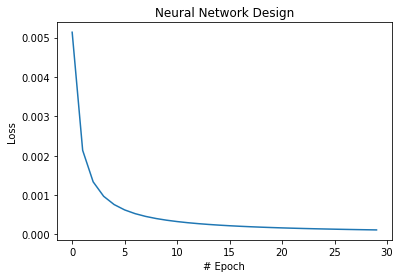

In [9]:
#Plots loss vs # of epochs
plt.plot(loss)
plt.title('Neural Network Design')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.show()